# Sloan Digital Sky Surveys: Stellar Object Classification

## Table of Contents

1. [Project Overview](#project-overview)
2. [Concept Overview](#concept-overview)
3. [Data Overview](#data-overview)
    * [Data Features](#data-features)
    * [Citation](#citation)
5. [Data Loading](#data-loading)
6. [Exploratory Data Analysis](#eda)
    * [Data Structure and Viability](#structure)
    * [Errorsome Data](#errorsome_data)
    * [Feature Distributions](#distributions)
    * [Correlations](#correlations)
8. [Model Training](#model-training)
    * [Feature Relevance](#feature-relevance)
    * [Small Scale Comparisons](#small-scale-comparisons)
    * [Large Scale Models](#large-scale-models)
10. [Model Evaluation](#model-evaluation)
    * [Accuracies](#accuracies)
    * [ROC Curves](#roc-curves)
    * [Classification Proportions](#class-props)
12. [Conclusions](#conclusions) 
13. [Growth & Next Steps](#growth)

## Project Overview <a id="project-overview"></a>

The Stellar Classification Dataset - SDSS17 was downloaded from kaggle.com. This dataset consists of 100000 observations of 17 stellar observation attributes taken from the SDSS observatory in Apache, New Mexico. It also contains a column of assigned 'class' labels for each observation. The dataset was explored and found to contain 1 clear erroneous observation and multiple erroneous values due to truncation in data transfer. A logarithmic transformation was applied to redshift values in order to improve separation at different orders of magnitude. Minmax scaling was applied to features to preserve the unique and varied natures of the distributions. A 200 row sample subset was taken and used for parameter optimisation for Logisctic Regression, Decison tree, Random Forest, AdaBoosted Gaussian Naive Bayes, AdaBoosted Decision Tree, Light Gradient Boosted Machine and an ensemble Stacking model as well as separate K-Nearest Neighbour models. These models were then trained and tested on an 80:20 split of the full dataset stratified by the target outcome 'class'.
This yielded a poor accuracy for the AdaBoosted Gaussian Naive Bayes model (70%), which was to be expected given the non-gaussian distributions observed. The remaining models yielded accuracies from 95% to a maximum of 97.74% for the stacked ensemble method. There was not a greatly significant difference in accuracies between the small scale trained models when applied to the full dataset warranting further investigation into the trade-off between training set size and predictive power for this data.

## Concept Overview <a id="concept-overview"></a>

This project focusses on supervised learning models. In other words, machine learning models trained on a dataset with known outcomes in order to predict outcomes for new data. It loads a rough data product, analyses, cleans and engineers it into a usable dataframe. A small sample is taken and used to optimise hyperparameters for machine learning classification models. These models are then trained on 80% of the cleaned dataset to make predicitons on the remaining 20%. Performances of the models are then compared and assessed.

## Data Overview <a id="data-overview"></a>



In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classify stars, galaxies, and quasars based on their spectral characteristics.

### Data Features <a id="data-features"><a/>


The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS. This number is the integer interpretation of a 64 bit identifier code combining RUN, CAMCOL, FIELD, ID, RERUN.
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class). This number is the integer interpretation of a 64 bit identifier code combining plate number, mjd, and fiberid.
- class = object class (galaxy, star or quasar object)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


### Citation <a id="citation"><a/>


The data released by the SDSS is under public domain. Its taken from the current data release RD17.
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved 15/01/2022 from   [https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17](https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17)

More information about the license:  [http://www.sdss.org/science/image-gallery/](http://www.sdss.org/science/image-gallery/)

SDSS Publications:
Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS)

## Data Loading <a id="data-loading"><a/>

In [1]:
#Library importation
import pandas as pd
import numpy as np
# Define datatypes as string for highly specific data values
dtype_dict = {
    'obj_ID': str,
    'spec_obj_ID': str,
    'alpha': str,
    'delta': str,
    'redshift': str
}
#Read data
SDSS = pd.read_csv('star_classification.csv',dtype=dtype_dict)
SDSS.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232,135.6891066036,32.4946318397087,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6543777369295181824,GALAXY,0.6347936,5812,56354,171
1,1237664879951151360,144.826100550256,31.2741848944939,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,11760142036707334144,GALAXY,0.779136,10445,58158,427
2,1237660961330430208,142.188789562506,35.5824441819976,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5152200256025548800,GALAXY,0.6441945,4576,55592,299
3,1237663478724297984,338.741037753146,-0.402827574587482,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,10301071412954421248,GALAXY,0.9323456,9149,58039,775
4,1237680272041378048,345.282593210935,21.1838656010284,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6891864880783316992,GALAXY,0.1161227,6121,56187,842


## Exploratory Data Analysis <a id="eda"><a/>

### Data structure and viability <a id="structure"><a/>

In [2]:
#Data shape and column names
print(SDSS.shape)
SDSS.columns

(100000, 18)


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [3]:
# Data types
SDSS.dtypes

obj_ID          object
alpha           object
delta           object
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID     object
class           object
redshift        object
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [4]:
#Set the class variable to categorical type
SDSS['class']=SDSS['class'].astype('category')
SDSS['class'].unique()

['GALAXY', 'QSO', 'STAR']
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [5]:
#Missing values (coded as NaN)
missing_values = SDSS.isna().sum()

# Check for missing values coded as zero or empty strings
missing_values_zero = (SDSS.apply(pd.to_numeric, errors='coerce') == 0).sum()  # Count zeros in each column
missing_values_empty_strings = (SDSS == '').sum()  # Count empty strings in each column

# Combine the counts of missing values
total_missing_values = missing_values + missing_values_zero + missing_values_empty_strings

# Print the total missing values for each column
print("Total Missing or 0 Values for Each Column:    Total 0s:")
for key,(value1) in total_missing_values.items():
    value2 = missing_values_zero[key]
    print(f"{key}{(33-len(key)-len(str(value1)))*' '}{value1}{(18-len(str(value2)))*' '}{value2}")

Total Missing or 0 Values for Each Column:    Total 0s:
obj_ID                          0                 0
alpha                           0                 0
delta                           0                 0
u                               0                 0
g                               0                 0
r                               0                 0
i                               0                 0
z                               0                 0
run_ID                          0                 0
rerun_ID                        0                 0
cam_col                         0                 0
field_ID                        0                 0
spec_obj_ID                     0                 0
class                           0                 0
redshift                      412               412
plate                           0                 0
MJD                             0                 0
fiber_ID                        0                 0


In [6]:
# Inspect zero values for redshift
SDSS[SDSS['redshift'].apply(pd.to_numeric, errors='coerce')==0].sample(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
67049,1237662663208600320,220.177659865623,34.749465612742,23.33666,22.27761,21.03975,19.91222,19.32676,4002,301,4,80,12107963745168545792,GALAXY,0,10754,58224,131
37092,1237667735034594048,157.797628476902,20.1393782403167,25.19764,21.82302,20.01522,19.18898,18.85283,5183,301,3,179,6626190433386256384,GALAXY,0,5885,56036,980
25410,1237654601561801472,146.388704768987,4.11481721105801,23.57344,22.38981,20.71260,19.77443,19.30099,2125,301,4,184,5402128596210046976,GALAXY,0,4798,55672,221
49478,1237664669496836352,126.008613759156,24.2066424524086,19.58394,17.95306,17.09853,16.67209,16.36348,4469,301,5,105,2170787852768536576,GALAXY,0,1928,53327,192
11406,1237670962159419648,35.569873767222,23.4334873311735,20.26705,18.52029,17.77153,17.46179,17.28137,5934,301,6,84,3649070817075109888,GALAXY,0,3241,54884,106
59580,1237668331490967808,219.767743267344,13.9881552104929,20.10667,18.21353,17.19121,16.74896,16.40040,5322,301,2,69,3095173132097447936,GALAXY,0,2749,54241,270
32576,1237665531725742592,245.829892105186,14.1760987130758,19.28666,19.21952,19.04372,19.14399,19.42164,4670,301,3,322,2480456791381534720,GALAXY,0,2203,53915,361
90584,1237661150842520320,198.853385219754,48.7969113207916,23.24708,23.30968,21.57121,20.47193,19.71567,3650,301,3,69,8342061904383203328,GALAXY,0,7409,56809,980
5517,1237653651844759808,23.103447707944,14.1103354062296,21.71247,21.50200,21.15836,21.12568,20.55237,1904,301,3,300,12461587304933513216,GALAXY,0,11068,58488,462
11637,1237659326025302272,238.527797502787,46.3710477771926,19.14370,18.12676,17.80725,17.69079,17.64210,3225,301,4,176,3888973810891857920,GALAXY,0,3454,55003,420


In [7]:
#Find the minimum magnitude of redshift that is not 0 to check for rounding coercion
min(abs(SDSS[SDSS.redshift!='0']['redshift'].apply(pd.to_numeric, errors='coerce')))

2.272641e-08

In [8]:
#statistical description of numeric dataframe
SDSS.apply(pd.to_numeric, errors='coerce').describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,0.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,NaN,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,NaN,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,NaN,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,NaN,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,NaN,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,NaN,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,NaN,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
# Note that the maximum alpha has an order of magnitude of 2, so a float64 representation has a 
# minimum potential accuracy of 12dp. The maximum delta has an order of magnitude of 1, so its 
# minimum potential accuracy is 13dp. For redshift, order of magnitude 0, so its minimum potential
# accuracy is 14dp.

### Errorsome Data <a id="errorsome_data"><a/>

In [10]:
#Investigate unique feature values
SDSS.nunique()

obj_ID          80846
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [11]:
#Compare to values if strings are converted to numeric
SDSS.select_dtypes(include='object').apply(pd.to_numeric, errors='coerce').nunique()

obj_ID          78053
alpha           99999
delta           99999
spec_obj_ID    100000
redshift        99295
dtype: int64

In [12]:
#Investigate the 1 instance of alpha and delta duplication
dup_mask = SDSS['alpha'].duplicated(keep=False)
SDSS[dup_mask]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
62668,1237657070088618240,34.7496000239765,-0.601931234468058,23.0401,21.71487,21.54097,22.23682,22.60238,2700,301,2,98,455997189320108032,GALAXY,0.02051743,405,51816,28
62669,1237657070088618240,34.7496000239765,-0.601931234468058,23.0401,21.71487,21.54097,22.23682,22.60238,2700,301,2,98,1696737544936384512,GALAXY,0.02048849,1507,53763,23


This shows that there are two separate items with similar observations; not a duplicate.

#### Rounding errors - Truncation

In [14]:
#Create a function to find the largest decimal place holder of the difference between two numeric strings
def compare_numeric_strings(str1, str2):
    '''Takes two numeric string terms as inputs and splits them about the decimal point. Checks that both 
    strings have been split into two parts. Checks that the integer parts match otherwise returning -1.
    Finds the minimum shared length of the fractional parts ie the minimum shared precison. Loops over that 
    length until it finds a non-match then returns the decimal place holder of the first non-match. 
    '''
    # Split strings by the decimal point
    parts1 = str1.split('.')
    parts2 = str2.split('.')
    # Ensure both strings are numeric and have a decimal part
    if len(parts1) != 2 or len(parts2) != 2:
        return -1  # Not comparable
    # Compare the integer parts
    if parts1[0] != parts2[0]:
        return -1  # Different integer parts
    # Compare the fractional parts
    frac1 = parts1[1]
    frac2 = parts2[1]
    # Find the length of the common prefix of digits
    min_len = min(len(frac1), len(frac2))
    #loop over the decimal places
    for i in range(min_len):
        if frac1[i] != frac2[i]:
            return i + 1

In [15]:
#test compare_numeric_strings
compare_numeric_strings('11122.123456789111','11122.12345678923467')

10

In [16]:
#Create a function to find the minimum value of the largest decimal place holder of the difference between 
#consecutive ordered numeric string values of a column
def min_difference_within_precision(column):
    '''Takes a dataframe column of numeric strings as input, converts to a numpy array, finds all the unique
    values and orders them. Compares consecutive unique strings using the compare_numeric_strings function 
    looking for the largest value corresponding to the minimum numeric difference between strings and returns 
    that value representing the first decimal place in which a difference is seen. This infers the minimum 
    decimal place accuracy required to prevent distinct values from being seen as identical.
    '''
    vals=column.to_numpy(dtype=str)
    # Remove duplicates and sort
    unique_sorted_values = np.sort(np.unique(column))
    # Initialize variables
    min_dp = -1
    # Iterate through sorted values to find minimum difference
    for i in range(1, len(unique_sorted_values)):
        dp=compare_numeric_strings(unique_sorted_values[i],unique_sorted_values[i-1])
        if dp is not None and dp > min_dp:
            min_dp= dp
    # Return the decimal place holder of the minimum difference found
    return min_dp

In [17]:
#Use on alpha column
min_difference_within_precision(SDSS.alpha)

8

In [18]:
#Use on delta column
min_difference_within_precision(SDSS.delta)

9

In [19]:
#Use on redshift column
min_difference_within_precision(SDSS.redshift)

10

In [20]:
# Note that all these values happen to be 4 orders of magnitude greater than their respective 
# minimum potential accuracies if converted from strings to float64 type; so safe to convert.
for i in ['alpha','delta','redshift']:
    SDSS[i] = SDSS[i].astype('float64')
SDSS.dtypes

obj_ID           object
alpha           float64
delta           float64
u               float64
g               float64
r               float64
i               float64
z               float64
run_ID            int64
rerun_ID          int64
cam_col           int64
field_ID          int64
spec_obj_ID      object
class          category
redshift        float64
plate             int64
MJD               int64
fiber_ID          int64
dtype: object

In [21]:
#Investigate instances with 19 digit, obj_ID, being numerically rounded prior to loading
erround1 = SDSS['obj_ID'].str.contains('e+').sum()
erround1

988

In [22]:
#Investigate instances with 19 digit, spec_obj_ID, being numerically rounded prior to loading
erround2 = SDSS['spec_obj_ID'].str.contains('e+').sum()
erround2

2014

In [23]:
#Whilst every spec_obj_ID remains unique, there are duplicates in obj_ID. Inspect a sample of these
SDSS[SDSS['obj_ID'].str.contains('e+')]['obj_ID'].sample(10)

80077    1.237673412971e+18
72855    1.237664877804e+18
84229    1.237661357543e+18
12798    1.237662195596e+18
17400    1.237678597541e+18
4954     1.237663782599e+18
40480    1.237663916268e+18
44826    1.237665537082e+18
46562    1.237651539253e+18
14159    1.237672764443e+18
Name: obj_ID, dtype: object

In [24]:
#How many obj_ID duplicates exist?
dups1 = SDSS['obj_ID'].duplicated().sum()
dups1

19154

In [25]:
#How many duplicates are there in the rows that have the rounding error for obj_ID?
dups2 = SDSS[SDSS['obj_ID'].str.contains('e+')]['obj_ID'].duplicated().sum()
dups2

396

In [26]:
#Compare proportion of duplicates in rounding error rows with proportion in non-error rows
print(f"{round(100*dups2/erround1,2)}% of obj_ID values with rounding errors are duplicates compared to {round(100*(dups1-dups2)/(100000-erround1),2)}% of values without rounding errors")

40.08% of obj_ID values with rounding errors are duplicates compared to 18.95% of values without rounding errors


In [27]:
# As the spec_obj_ID is effectively an index we will discount from the models. As there is only 1 value for rerun_ID, 
# we will drop this column also, noting that the scope of models is restricted to observations with rerun_ID of 301.
SDSS.drop(columns=['rerun_ID','spec_obj_ID'], inplace=True)
SDSS.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,1237660961327743232,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,0.634794,5812,56354,171
1,1237664879951151360,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,0.779136,10445,58158,427
2,1237660961330430208,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,0.644195,4576,55592,299
3,1237663478724297984,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,0.932346,9149,58039,775
4,1237680272041378048,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,0.116123,6121,56187,842


If obj_ID contributes to the models in any way, the truncation errors will need to be considered and the scope must 
be defined. Further investigation into how the ID is created exposes that the only potential new piece of information
in the obj_ID is the individual object number within the specific field, run, rerun and camcol. As this information 
is encoded in the less significant bytes section of the obj_ID, without the use of the "sdsspy.util.photoid_extract()"
function there is no simple way to extract the information. 
We will look to split the obj_ID strings. The first 5 digits, '12376' are shared by all observations so
cannot contribute to class differentiation. If we split after 10 digits,this provides 100,000 possible unique 
combinations for the first part, 1000 possible combinations for the second part of the 988 "error" rows (imputing 
the missing component with six 0s) and 10^9 combinations for the second part of the "non-error" rows.

In [28]:
# Function to split obj_ID into two columns
def split_obj_id(row):
    obj_id = str(row['obj_ID']).replace('.', '')  # Remove the decimal for scientific notation
    if 'e+' in obj_id:  # Check if it's in scientific notation
        # Split scientific notation into mantissa and exponent parts
        mantissa, exponent = obj_id.split('e+')
        # Split into two parts
        obj_id1 = int(mantissa[:10])
        obj_id2 = int(mantissa[10:19].ljust(9,'0'))
    else:
        # Split into two parts
        obj_id1 = int(obj_id[:10]) if len(obj_id) >= 10 else 0  # Take the first 10 digits
        obj_id2 = int(obj_id[10:19]) if len(obj_id) >= 19 else 0  # Take the next 9 digits
    
    return pd.Series({'obj_ID1': obj_id1, 'obj_ID2': obj_id2})

# Apply function to create new columns
SDSS[['obj_ID1', 'obj_ID2']] = SDSS.apply(split_obj_id, axis=1)
SDSS.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID,obj_ID1,obj_ID2
0,1237660961327743232,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,0.634794,5812,56354,171,1237660961,327743232
1,1237664879951151360,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,0.779136,10445,58158,427,1237664879,951151360
2,1237660961330430208,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,0.644195,4576,55592,299,1237660961,330430208
3,1237663478724297984,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,0.932346,9149,58039,775,1237663478,724297984
4,1237680272041378048,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,0.116123,6121,56187,842,1237680272,41378048


In [29]:
SDSS['obj_ID2'].describe()

count    1.000000e+05
mean     4.901535e+08
std      2.931561e+08
min      0.000000e+00
25%      2.404211e+08
50%      4.960202e+08
75%      7.531325e+08
max      9.999734e+08
Name: obj_ID2, dtype: float64

In [30]:
sum(SDSS['obj_ID2']==0)

1

In [31]:
#Now the obj_ID column can be dropped 
SDSS.drop(columns=['obj_ID'], inplace=True)
SDSS.shape

(100000, 17)

#### Outliers

In [32]:
#Investigate why min of u, g and z is so low:
SDSS[SDSS['u']<0]

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID,obj_ID1,obj_ID2
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,2,537,STAR,0.000089,3314,54970,162,1237648703,521095936


The one observation at index 79543 has identical non-sensical values for u, g and z of -9999.0. This greatly effects the distribution statistics of the dataset and impacts how scalers will transform the data so must be dropped.

In [33]:
SDSS.drop(index=79543)['u'].describe()

count    99999.000000
mean        22.080679
std          2.251068
min         10.996230
25%         20.352410
50%         22.179140
75%         23.687480
max         32.781390
Name: u, dtype: float64

In [34]:
SDSS.drop(index=79543)['g'].describe()

count    99999.000000
mean        20.631583
std          2.037384
min         10.498200
25%         18.965240
50%         21.099930
75%         22.123775
max         31.602240
Name: g, dtype: float64

In [35]:
SDSS.drop(index=79543)['z'].describe()

count    99999.000000
mean        18.768988
std          1.765982
min          9.612333
25%         17.460830
50%         19.004600
75%         19.921120
max         29.383740
Name: z, dtype: float64

In [36]:
SDSS=SDSS.drop(index=79543)
SDSS=SDSS.reset_index(drop=True)

### Feature Distributions <a id="distributions"><a/>

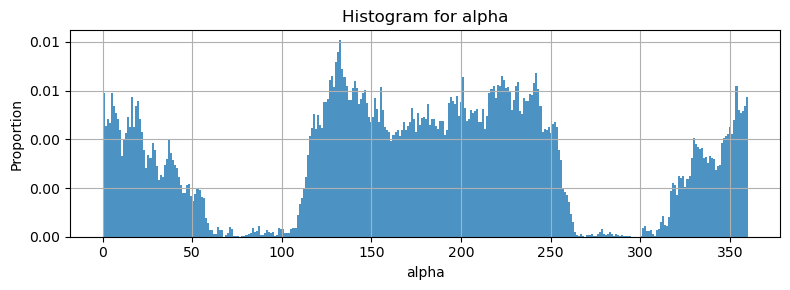

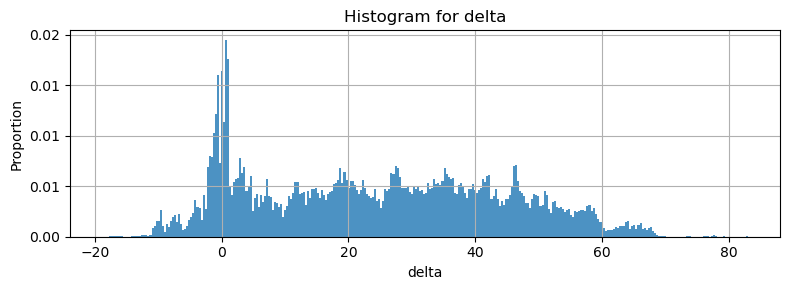

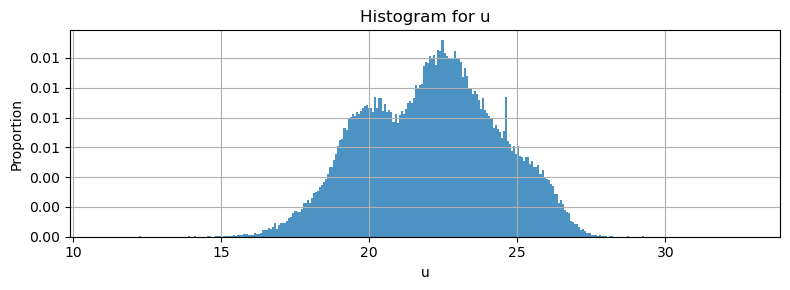

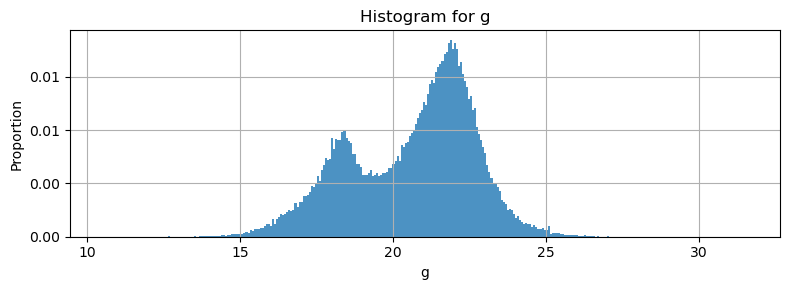

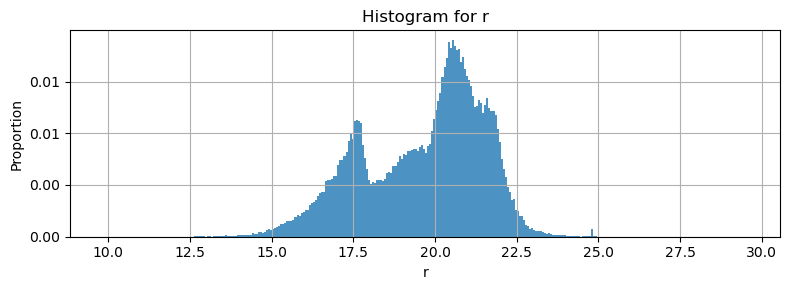

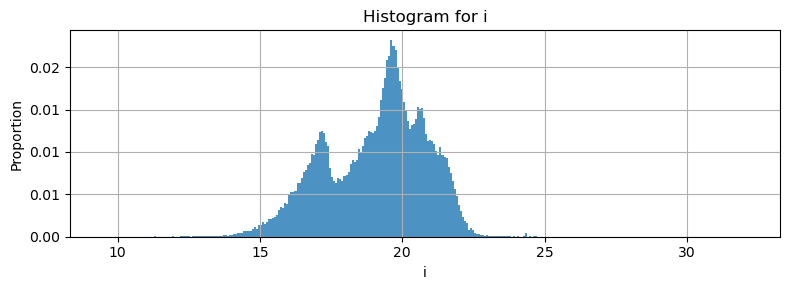

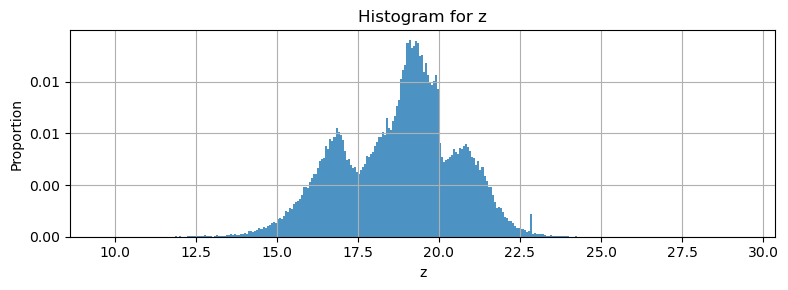

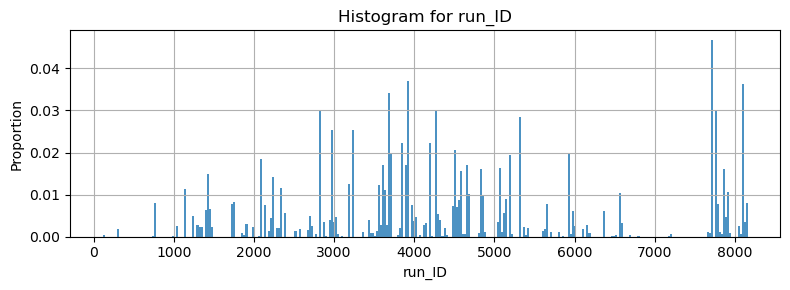

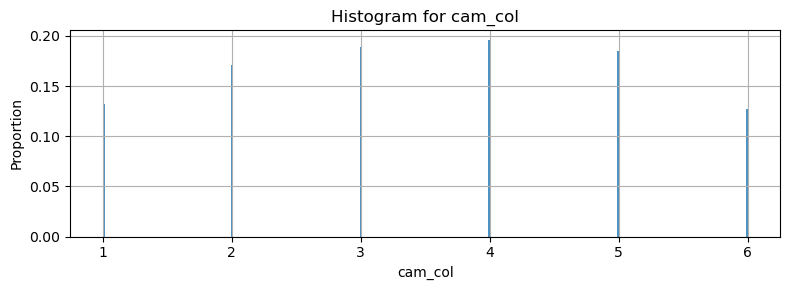

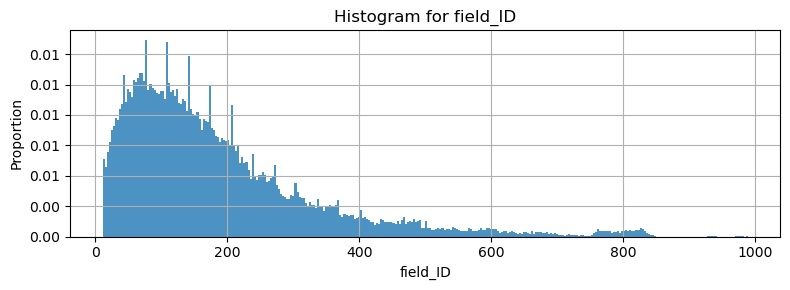

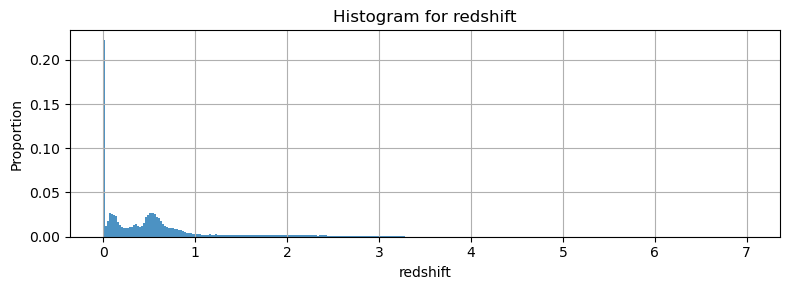

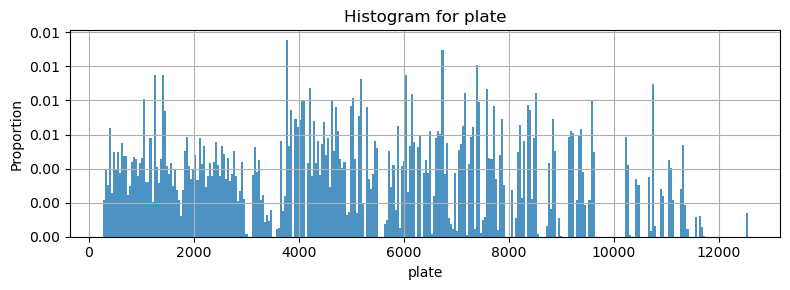

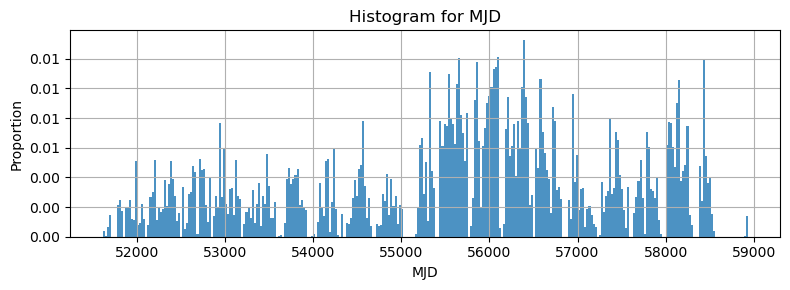

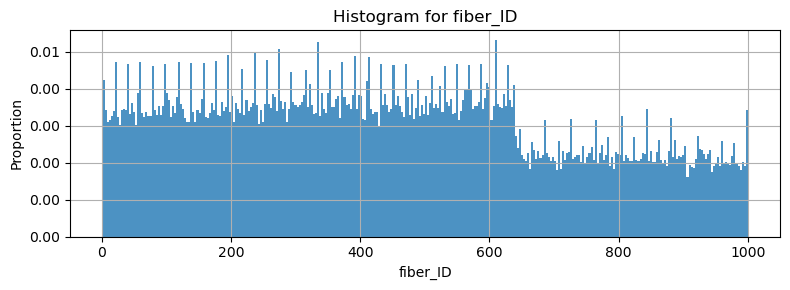

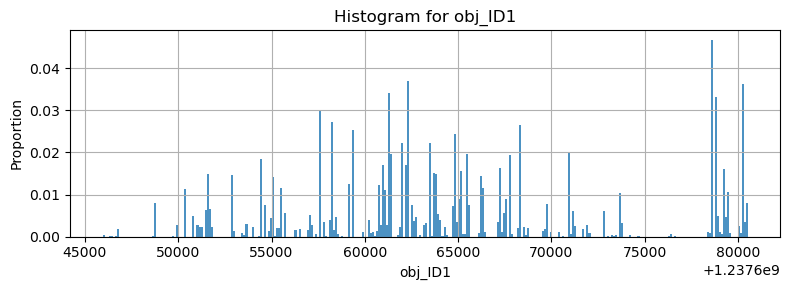

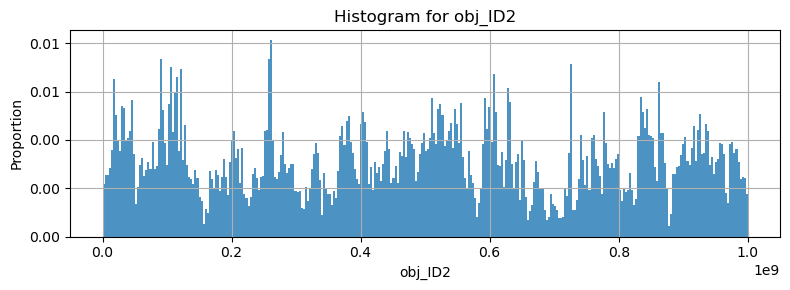

In [37]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline
# Create separate plots for each numeric column
for col in SDSS.drop(columns=['class']).columns:
    plt.figure(figsize=(8, 3))  # Create a new figure for each plot
    counts, bins, _ = plt.hist(SDSS.drop(columns=['class'])[col], bins=316, alpha=0.8)

    # Calculate bin widths
    bin_widths = np.diff(bins)

    # Convert counts to proportions
    proportions = counts / 100000  # Assuming 2000 is the total number of samples
    # Adjust yticks to represent proportions
    plt.gca().set_yticklabels(['{:.2f}'.format(x/100000) for x in plt.gca().get_yticks()])
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.grid(True)
    plt.tight_layout()
plt.show()

The vastly varied nature of the feature distributions requires the use of a non-gaussian scaler in order to preserve the characteristic shapes and not smooth over potentially valuable information. MinMaxScaler will be selected for this purpose.

### Correlations <a id="correlations"><a/>

In [38]:
# Scale the features with MinMaxScaler to preserve the non-gaussian distributions
from sklearn.preprocessing import MinMaxScaler
X = SDSS.drop(columns=['class'])
scaler=MinMaxScaler(feature_range=(0,10000))
# Apply preprocessing to your data
scaled_features = scaler.fit_transform(X)
scaled_features = pd.DataFrame(scaled_features,columns=X.columns)

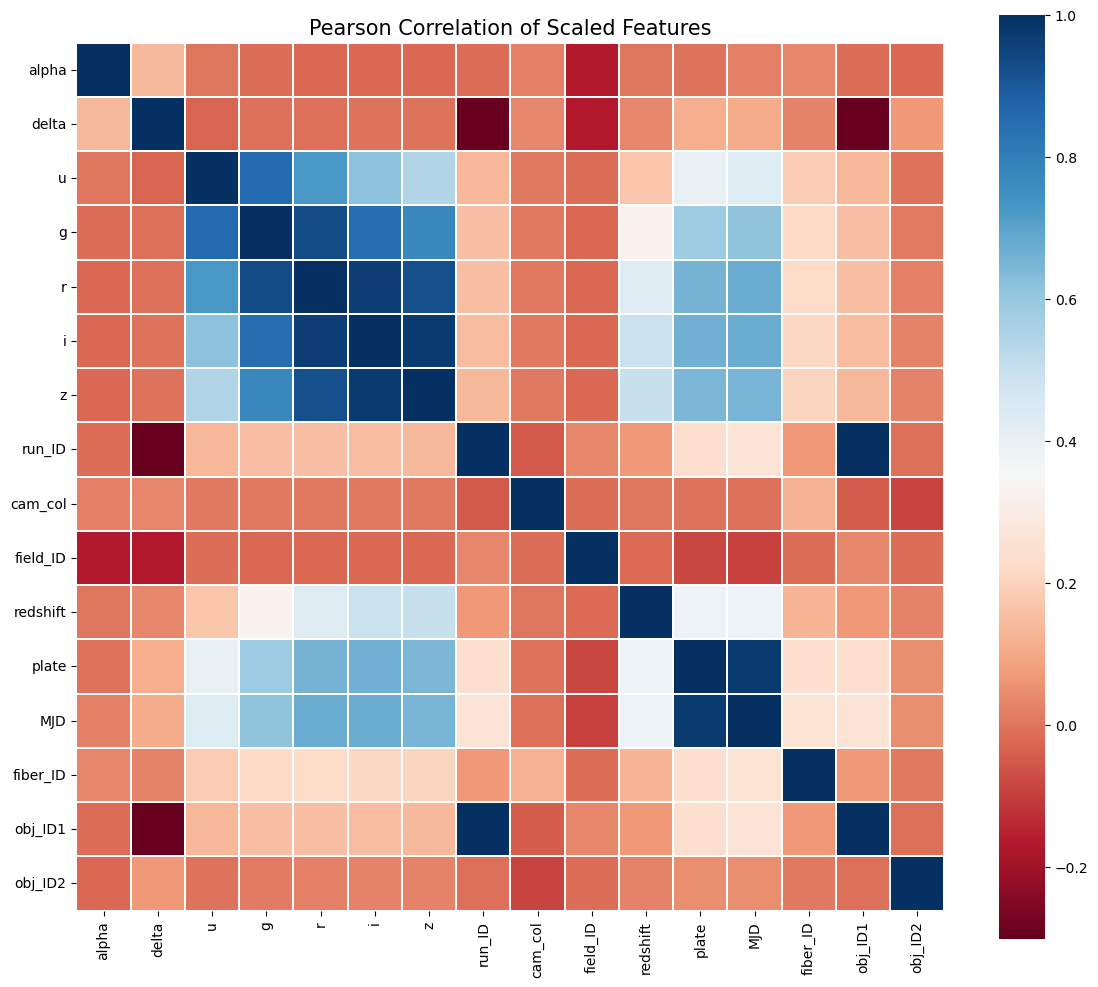

In [39]:
colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Scaled Features', size = 15)
sns.heatmap(scaled_features.corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = False)
plt.show()

In [40]:
#Perform one_hot coding for the class categories for correlation analysis
one_hot_class = pd.get_dummies(SDSS['class'])
one_hot_class.head()

,GALAXY,QSO,STAR
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


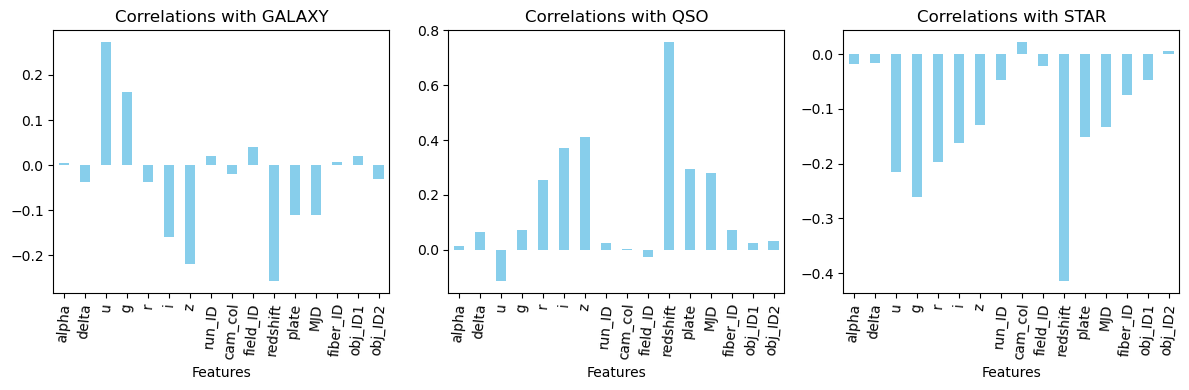

In [41]:
#Plot correlations of each of the scaled features with the categories
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
names = ['GALAXY','QSO','STAR']
for i,ax in enumerate(axes):
    corr_with_target = scaled_features.corrwith(one_hot_class[names[i]])
    corr_with_target.plot(kind='bar',ax=ax,color='skyblue')
    ax.set_title(f"Correlations with {names[i]}")
    ax.tick_params(axis='x',rotation=85)
    ax.set_xlabel('Features')
plt.tight_layout()
plt.show()

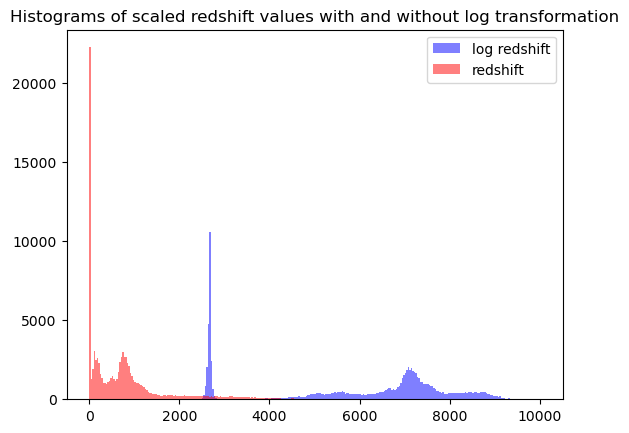

In [42]:
# Can see that redshift is the most correlated feature but can it be transformed to provide further separation?
plt.hist(scaler.fit_transform(np.log(SDSS['redshift']+0.011).values.reshape(-1, 1)),bins =300,color='blue',alpha=0.5,label='log redshift')
plt.hist(scaled_features['redshift'],bins =300,color='red',alpha=0.5, label='redshift')
plt.title('Histograms of scaled redshift values with and without log transformation')
plt.legend()
plt.show()

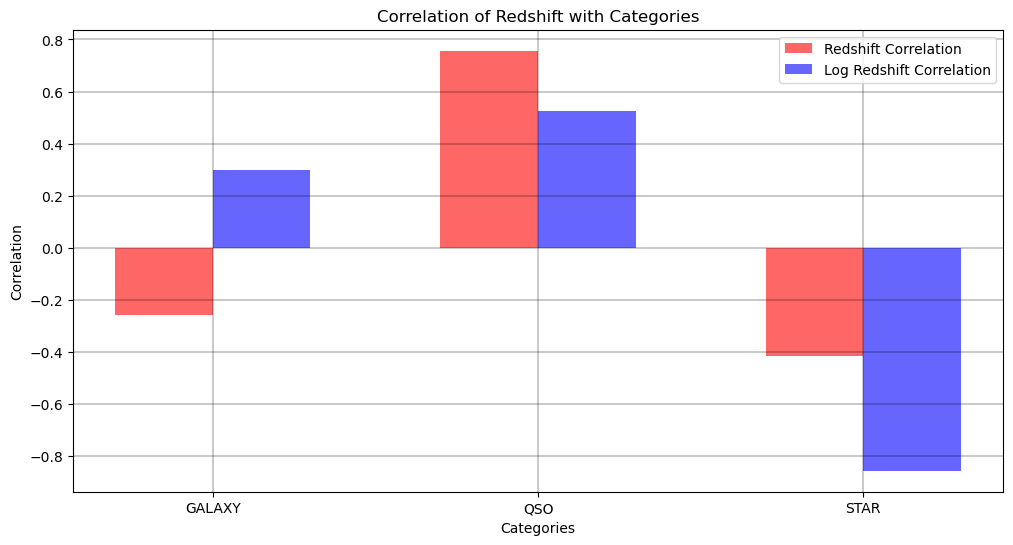

In [43]:
correlations_red = one_hot_class.corrwith(scaled_features['redshift'])
log_transformed_redshift = np.log(SDSS['redshift'] + 0.011).values.reshape(-1, 1)
scaled_log_redshift = scaler.fit_transform(log_transformed_redshift)
scaled_log_redshift = pd.DataFrame(scaled_log_redshift,columns=['log_redshift'])
correlations_blue = one_hot_class.corrwith(scaled_log_redshift['log_redshift'])
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
index = np.arange(len(one_hot_class.columns))
# Plot red bars (scaled_features['redshift'] correlations)
ax.bar(index, correlations_red, color='red', alpha=0.6, width=bar_width, label='Redshift Correlation')
# Plot blue bars (log transformed and scaled 'redshift' correlations)
ax.bar(index + bar_width, correlations_blue, color='blue', alpha=0.6, width=bar_width, label='Log Redshift Correlation')
# Customize plot
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(one_hot_class.columns)
ax.grid(which='major', linestyle='-', linewidth='0.3', color='black')
ax.set_xlabel('Categories')
ax.set_ylabel('Correlation')
ax.set_title('Correlation of Redshift with Categories')
ax.legend()
plt.show()

log_redshift provides a much stronger negative correlation for the 'STAR' category and also flips 
sign for the 'GALAXY' category so will add as an additional feature for models

In [45]:
X= pd.concat([scaled_features,scaled_log_redshift],axis=1)
Y=SDSS['class']

## Model Training <a id="model-training"></a>

In [46]:
#pip install lightgbm

In [47]:
#Import libraries/packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import StackingClassifier as SC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import feature_selection as FS
from lightgbm import LGBMClassifier as LGBC
from mlxtend.plotting import plot_learning_curves

In [48]:
#Create 200 row sample subset
combined=pd.concat([X,Y],axis=1)
SAMPLE=combined.sample(n=200,random_state=94)
SAMPLE_Y=SAMPLE['class']
SAMPLE_X=SAMPLE.drop(columns=['class'])

### Feature Relevance <a id="feature-relevance"><a/>

In [49]:
#instantiate Logistic Regression estimator
estimator=LogReg(multi_class='auto', solver='saga', max_iter=10000, random_state=94)
#instantiate RFE
selector = FS.RFE(estimator, n_features_to_select=12, step=1)
#Fit Features, target
selector = selector.fit(SAMPLE_X,SAMPLE_Y)
# Print Score
print(f"Accuracy of the logistic regression model used in RFE on the dataset is {100*selector.score(SAMPLE_X,SAMPLE_Y)}%")
# Find Top 4 Features
print(f"The top features selected by RFE are: {selector.get_feature_names_out()}")

Accuracy of the logistic regression model used in RFE on the dataset is 93.5%
The top features selected by RFE are: ['delta' 'u' 'g' 'r' 'i' 'z' 'redshift' 'plate' 'MJD' 'fiber_ID' 'obj_ID2'
 'log_redshift']


In [50]:
SAMPLE_X.shape

(200, 17)

 N Top Features
** ************
 1 ['z']
 2 ['z' 'log_redshift']
 3 ['g' 'z' 'log_redshift']
 4 ['g' 'i' 'z' 'log_redshift']
 5 ['g' 'i' 'z' 'redshift' 'log_redshift']
 6 ['g' 'r' 'i' 'z' 'redshift' 'log_redshift']
 7 ['u' 'g' 'r' 'i' 'z' 'redshift' 'log_redshift']
 8 ['u' 'g' 'r' 'i' 'z' 'redshift' 'MJD' 'log_redshift']
 9 ['u' 'g' 'r' 'i' 'z' 'redshift' 'plate' 'MJD' 'log_redshift']
10 ['u' 'g' 'r' 'i' 'z' 'redshift' 'plate' 'MJD' 'fiber_ID' 'log_redshift']
11 ['delta' 'u' 'g' 'r' 'i' 'z' 'redshift' 'plate' 'MJD' 'fiber_ID'
 'log_redshift']
12 ['delta' 'u' 'g' 'r' 'i' 'z' 'redshift' 'plate' 'MJD' 'fiber_ID' 'obj_ID2'
 'log_redshift']
13 ['delta' 'u' 'g' 'r' 'i' 'z' 'run_ID' 'redshift' 'plate' 'MJD' 'fiber_ID'
 'obj_ID2' 'log_redshift']
14 ['delta' 'u' 'g' 'r' 'i' 'z' 'run_ID' 'field_ID' 'redshift' 'plate' 'MJD'
 'fiber_ID' 'obj_ID2' 'log_redshift']
15 ['alpha' 'delta' 'u' 'g' 'r' 'i' 'z' 'run_ID' 'field_ID' 'redshift'
 'plate' 'MJD' 'fiber_ID' 'obj_ID2' 'log_redshift']
16 ['alpha' 'd

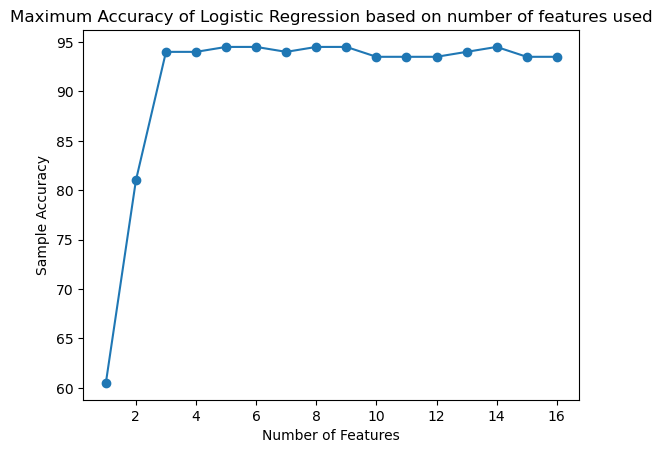

In [51]:
vals=[]
print(' N Top Features\n** ************')
for i in range(1,17):
    selector = FS.RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(SAMPLE_X,SAMPLE_Y)
    if i<10:
        print(f" {i} {selector.get_feature_names_out()}")
    else: 
        print(f"{i} {selector.get_feature_names_out()}")
    acc = 100*selector.score(SAMPLE_X,SAMPLE_Y)
    vals.append(acc)
plt.plot(range(1,17),vals,marker='o',linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Sample Accuracy')
plt.title('Maximum Accuracy of Logistic Regression based on number of features used')
plt.show()

In [52]:
print(f"Maxmum accuracy is {max(vals)}% and occurs when there are {vals.index(max(vals))+1} features used")

Maxmum accuracy is 94.5% and occurs when there are 5 features used


### Small Scale comparisons  <a id="small_scale_comparisons"><a/> 

In [53]:
#Split the sample data
X_train, X_test, y_train, y_test = train_test_split(SAMPLE_X, SAMPLE_Y, test_size=0.2, random_state=94)

#### Logistic Regression

In [54]:
clf0=LogReg(multi_class='auto', solver='saga', max_iter=10000, random_state=94)
LR_params = {
    'multi_class': ['ovr','multinomial'],
    'solver': ['lbfgs','saga','sag']
}
# Create a GridSearchCV object
grid_searchLR = GridSearchCV(clf0, LR_params, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_searchLR.fit(X_train, y_train)
# Get the best parameters
best_paramsLR = grid_searchLR.best_params_
best_modelLR = grid_searchLR.best_estimator_
best_modelLR = best_modelLR.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsLR}")
print(f"Train set accuracy of best model is {best_modelLR.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelLR.score(X_test,y_test)}")

Best Parameters: {'multi_class': 'ovr', 'solver': 'saga'}
Train set accuracy of best model is 0.95625
Test set accuracy of best model is 0.9


In [55]:
best_modelLR.score(X,Y)

0.931359313593136

#### Decision Tree Classifier

In [56]:
clf1 = DTC(random_state=94)
#Perform gridsearch to optimise parameters
DT_params = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,4,10,20],
    'min_samples_leaf': [1,2,4,6,10],
    'criterion': ["gini","entropy"],
    'min_impurity_decrease': [0.2,0.05,0.02,0.01,0.001]
}
# Create a GridSearchCV object
grid_searchDT = GridSearchCV(clf1, DT_params, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_searchDT.fit(X_train, y_train)
# Get the best parameters
best_params = grid_searchDT.best_params_
best_modelDT = grid_searchDT.best_estimator_
best_modelDT = best_modelDT.fit(X_train, y_train)
print(f"Best Parameters: {best_params}")
print(f"Train set accuracy of best model is {best_modelDT.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelDT.score(X_test,y_test)}")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.05, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train set accuracy of best model is 0.9375
Test set accuracy of best model is 0.9


In [57]:
best_modelDT.score(X,Y)

0.945739457394574

#### Random Forest Classifier

In [58]:
clf2 = RFC(random_state=94)
#Perform gridsearch to optimise parameters
RF_params = {
    'criterion': ["entropy"],
    'max_depth': [None, 2, 4,6],
    'n_estimators': [50,80,100,150],
    'max_features': [1,2,3,4]
}
# Create a GridSearchCV object
grid_searchRF = GridSearchCV(clf2, RF_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchRF.fit(X_train, y_train)
# Get the best parameters
best_paramsRF = grid_searchRF.best_params_
best_modelRF = grid_searchRF.best_estimator_
best_modelRF = best_modelRF.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsRF}")
print(f"Train set accuracy of best model is {best_modelRF.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelRF.score(X_test,y_test)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'n_estimators': 50}
Train set accuracy of best model is 1.0
Test set accuracy of best model is 0.95


In [59]:
best_modelRF.score(X,SDSS['class'])

0.9366593665936659

#### Support Vector Classifier

In [60]:
clf3 = SVC(random_state=94)
#Perform gridsearch to optimise parameters
SVC_params = {
    'C': [0.001,0.01,0.1, 1, 10, 100],
    'gamma': ['scale',0.001, 0.0001],
    'kernel': ['linear','rbf','sigmoid']
}
# Create a GridSearchCV object
grid_searchSV = GridSearchCV(clf3, SVC_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchSV.fit(X_train, y_train)
# Get the best parameters
best_paramsSV = grid_searchSV.best_params_
best_modelSV = grid_searchSV.best_estimator_
best_modelSV = best_modelSV.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsSV}")
print(f"Train set accuracy of best model is {best_modelSV.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelSV.score(X_test,y_test)}")

Best Parameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
Train set accuracy of best model is 1.0
Test set accuracy of best model is 0.9


In [61]:
best_modelSV.score(X,Y)

0.9338293382933829

#### AdaBoost Boosting 

In [62]:
np.random.seed(94)
#set base models
basemodGNB = GNB(var_smoothing=1e-9)
basemodDT = DTC()
#set boosting models
abcGNB = ABC(estimator=basemodGNB, random_state=94)
abcDT = ABC(estimator=basemodDT, random_state=94)

In [63]:
#Perform gridsearch to optimise parameters
Boost_params = {
    'n_estimators': [20,40,60,100],
    'learning_rate': [0.001,0.01,0.05,0.1,1]
}
#Boosting on Gaussian Naive Bayes
# Create a GridSearchCV object
grid_searchAB1 = GridSearchCV(abcGNB, Boost_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchAB1.fit(X_train, y_train)
# Get the best parameters
best_paramsAB1 = grid_searchAB1.best_params_
best_modelAB1 = grid_searchAB1.best_estimator_
best_modelAB1 = best_modelAB1.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsAB1}")
print(f"Train set accuracy of best model is {best_modelAB1.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelAB1.score(X_test,y_test)}")

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 40}
Train set accuracy of best model is 0.94375
Test set accuracy of best model is 0.875


In [64]:
best_modelAB1.score(X,Y)

0.926689266892669

In [65]:
#Boosting on Decision Tree
#Perform gridsearch to optimise parameters
Boost_params = {
    'n_estimators': [2,50,100,150],
    'learning_rate': [0.05,0.1,0.5,1],
    'estimator__criterion': ["gini","entropy"],
    'estimator__max_depth': [3,4,None],
    'estimator__min_samples_leaf':[1,2,4]
}
# Create a GridSearchCV object
grid_searchAB2 = GridSearchCV(abcDT, Boost_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchAB2.fit(X_train, y_train)
# Get the best parameters
best_paramsAB2 = grid_searchAB2.best_params_
best_modelAB2 = grid_searchAB2.best_estimator_
best_modelAB2 = best_modelAB2.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsAB2}")
print(f"Train set accuracy of best model is {best_modelAB2.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelAB2.score(X_test,y_test)}")

Best Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'learning_rate': 1, 'n_estimators': 100}
Train set accuracy of best model is 1.0
Test set accuracy of best model is 0.95


In [66]:
best_modelAB2.score(X,Y)

0.9405694056940569

#### Light Gradient Boosting Machine

In [67]:
warnings.filterwarnings('ignore')
clf4 = LGBC(objective='multiclass', num_class=3, random_state=94,force_col_wise=True, verbose=-1)
# Perform gridsearch to optimise parameters
LGBC_params = {
    'learning_rate': [0.04,0.05],
    'boosting_type': ['gbdt','dart'],
    'num_leaves': [10,15,20,25,30],
    'max_depth': [2,3,5],
    'min_child_samples': [25, 30,35],
    'n_estimators': [30,20,10],
    'min_gain_to_split': [0.001,0.005]
}
# Create a GridSearchCV object
grid_searchLGBC = GridSearchCV(clf4, LGBC_params, cv=5, scoring='accuracy',n_jobs=-1)
# Fit the grid search to the data
grid_searchLGBC.fit(X_train, y_train)
# Get the best parameters
best_paramsLGBC = grid_searchLGBC.best_params_
best_modelLGBC = grid_searchLGBC.best_estimator_
best_modelLGBC = best_modelLGBC.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsLGBC}")
print(f"Train set accuracy of best model is {best_modelLGBC.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelLGBC.score(X_test,y_test)}")

Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.04, 'max_depth': 2, 'min_child_samples': 25, 'min_gain_to_split': 0.001, 'n_estimators': 30, 'num_leaves': 10}
Train set accuracy of best model is 0.9375
Test set accuracy of best model is 0.9


In [68]:
best_modelLGBC.score(X,Y)

0.944259442594426

#### Stacking

In [69]:
warnings.filterwarnings('ignore')
lr = LogReg(multi_class='auto', solver='saga', max_iter=10000, random_state=94)
estimators = [('LogReg', best_modelLR), ('DTC', best_modelDT), ('RFC', best_modelRF), ('SVC', best_modelSV), ('ABGNB', best_modelAB1), ('ABDT', best_modelAB2), ('LGBC', best_modelLGBC)]
sclf = SC(estimators=estimators, final_estimator=lr, cv=5, n_jobs=-1)
Stack_params = {
    'final_estimator__multi_class': ['ovr','multinomial'],
    'final_estimator__solver': ['lbfgs','saga'],
    'final_estimator__C': [0.001, 0.1, 10, 1000]
}
# Create a GridSearchCV object
grid_searchStack = GridSearchCV(sclf, Stack_params, cv=5, scoring='accuracy',n_jobs=-1,verbose=-1)
# Fit the grid search to the data
grid_searchStack.fit(X_train, y_train)
# Get the best parameters
best_paramsStack = grid_searchStack.best_params_
best_modelStack = grid_searchStack.best_estimator_
best_modelStack = best_modelStack.fit(X_train, y_train)
print(f"Best Parameters: {best_paramsStack}")
print(f"Train set accuracy of best model is {best_modelStack.score(X_train,y_train)}")
print(f"Test set accuracy of best model is {best_modelStack.score(X_test,y_test)}")

Best Parameters: {'final_estimator__C': 0.1, 'final_estimator__multi_class': 'ovr', 'final_estimator__solver': 'lbfgs'}
Train set accuracy of best model is 0.98125
Test set accuracy of best model is 0.9


In [70]:
best_modelStack.score(X,Y)

0.9413494134941349

#### K-Nearest Neighbours Classifier

##### Effects of altering k:

In [71]:
#The highest correlated features with class (|corr|>0.15)
high_corr_features = ['r','i','z','u','g','redshift','plate','log_redshift','MJD']

In [72]:
kX_train = X_train[high_corr_features]
kX_test = X_test[high_corr_features]

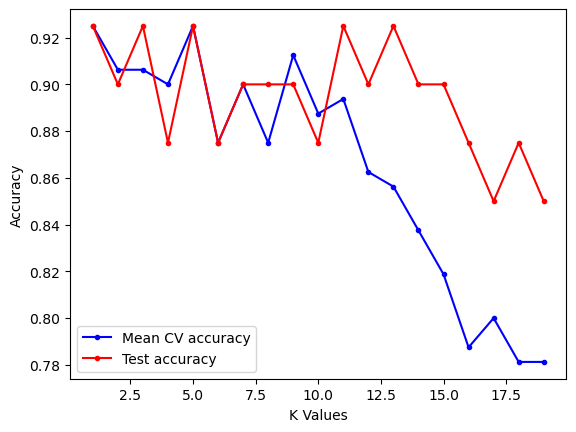

In [73]:
cvacc=[]
testacc=[]
for k in range(1,20):
    knn = KNN(n_neighbors=k,n_jobs=-1)
    knn=knn.fit(kX_train,y_train)
    cvacc.append(cross_val_score(knn, kX_train,y_train, cv = 5, scoring = 'accuracy').mean())
    testacc.append(knn.score(kX_test,y_test))
plt.plot(range(1,20),cvacc,linestyle='-',marker='.',color='blue',label='Mean CV accuracy')
plt.plot(range(1,20),testacc,linestyle='-',marker='.',color='red',label='Test accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Evaluating model based on correlated features

In [74]:
knn1 = KNN(n_neighbors=1,n_jobs=-1)
knn1=knn1.fit(kX_train,y_train)
print(f"Train set accuracy of k=1 model is {knn1.score(kX_train,y_train)}")
print(f"Test set accuracy of k=1 model is {knn1.score(kX_test,y_test)}")
knn3 = KNN(n_neighbors=3,n_jobs=-1)
knn3=knn3.fit(kX_train,y_train)
print(f"Train set accuracy of k=3 model is {knn3.score(kX_train,y_train)}")
print(f"Test set accuracy of k=3 model is {knn3.score(kX_test,y_test)}")
knn5 = KNN(n_neighbors=5,n_jobs=-1)
knn5=knn5.fit(kX_train,y_train)    
print(f"Train set accuracy of k=5 model is {knn5.score(kX_train,y_train)}")
print(f"Test set accuracy of k=5 model is {knn5.score(kX_test,y_test)}")

Train set accuracy of k=1 model is 1.0
Test set accuracy of k=1 model is 0.925
Train set accuracy of k=3 model is 0.95625
Test set accuracy of k=3 model is 0.925
Train set accuracy of k=5 model is 0.94375
Test set accuracy of k=5 model is 0.925


In [75]:
knn1.score(X[high_corr_features],Y)

0.930009300093001

In [76]:
knn3.score(X[high_corr_features],Y)

0.9276892768927689

In [77]:
knn5.score(X[high_corr_features],Y)

0.9266392663926639

##### Evaluating model based on all features

In [78]:
#Compare with using all features
knn1 = KNN(n_neighbors=1,n_jobs=-1)
knn1=knn1.fit(X_train,y_train)
print(f"Train set accuracy of k=1 model is {knn1.score(X_train,y_train)}")
print(f"Test set accuracy of k=1 model is {knn1.score(X_test,y_test)}")
knn3 = KNN(n_neighbors=3,n_jobs=-1)
knn3=knn3.fit(X_train,y_train)
print(f"Train set accuracy of k=3 model is {knn3.score(X_train,y_train)}")
print(f"Test set accuracy of k=3 model is {knn3.score(X_test,y_test)}")
knn5 = KNN(n_neighbors=5,n_jobs=-1)
knn5=knn5.fit(X_train,y_train)    
print(f"Train set accuracy of k=5 model is {knn5.score(X_train,y_train)}")
print(f"Test set accuracy of k=5 model is {knn5.score(X_test,y_test)}")

Train set accuracy of k=1 model is 1.0
Test set accuracy of k=1 model is 0.725
Train set accuracy of k=3 model is 0.83125
Test set accuracy of k=3 model is 0.675
Train set accuracy of k=5 model is 0.825
Test set accuracy of k=5 model is 0.7


In [79]:
knn1.score(X,Y)

0.6918969189691897

In [80]:
knn3.score(X,Y)

0.6917669176691766

In [81]:
knn5.score(X,Y)

0.6773567735677357

##### Evaluating model based on optimum correlated features

In [82]:
#Create function to find all combinations of features then evaluate the KKN accuracies for k =1,3 & 9 for testing and training
from itertools import combinations
def optimum(feats):
    l = len(feats) #number of features inputted
    trt=[] #initialise training accuracy tuple list
    tet=[] #initialise testing accuracy tuple list
    comp=[] #initialise composition list of lists
    for r in range(2,l + 1): #look at combinations of size 2 to the number of feature inputted
        for combo in combinations(feats, r): #iterate over every combination
            combo_list=list(combo) #convert combination to list format
            comp.append(combo_list) #add combination list to comp list
            #Initialise KNN models
            knn1 = KNN(n_neighbors=1,n_jobs=-1)
            knn3 = KNN(n_neighbors=3,n_jobs=-1)
            knn5 = KNN(n_neighbors=5,n_jobs=-1)
            #Fit KNN models
            knn1 = knn1.fit(X_train[combo_list],y_train)
            knn3 = knn3.fit(X_train[combo_list],y_train)
            knn5 = knn5.fit(X_train[combo_list],y_train)
            #create tuple of training accuracy scores
            trtup = (
                knn1.score(X_train[combo_list],y_train),
                knn3.score(X_train[combo_list],y_train),
                knn5.score(X_train[combo_list],y_train)
            )
            #create tuple of testing accuracy scores
            tetup = (
                knn1.score(X_test[combo_list],y_test),
                knn3.score(X_test[combo_list],y_test),
                knn5.score(X_test[combo_list],y_test)
            )
            trt.append(trtup) #add training tuple
            tet.append(tetup) #add testing tuple
    return comp,trt,tet
    

In [83]:
#Create function to find the maximum value in a list of tuples and the indices of it's occurrence
def maxfinder(tups):
    max_val=None #Initialise maximum accuracy value
    max_val_indices=[] #Initialise indices list
    for i,tuple_ in enumerate(tups): #iterate over each tuple in the tuple list
        valmax=max(tuple_) #find the maximum value in the tuple
        if max_val is None or valmax > max_val: #check if maximum tuple value is the greatest so far
            max_val = valmax #update maximum accuracy value
            max_val_indices=[(i,j) for j,v in enumerate(tuple_) if v==valmax] #update indices list
        elif valmax ==max_val: #if max value in tuple is equally greatest so far
            max_val_indices.extend([(i,j) for j,v in enumerate(tuple_) if v==valmax]) #extend the indices list
    return max_val,max_val_indices

In [84]:
a,b=maxfinder([(1,2,3),(2,1,4),(6,2,6),(6,1,2)])
print(a)
print(b)

6
[(2, 0), (2, 2), (3, 0)]


In [85]:
#Create function to retrieve the kvalues and component lists from an index tuple or tuples list
def modelfinder(ind,comp):
    components= [] #initialise components list of lists
    k=[] #initialise k values list
    kvals = [1,3,5] #options for k values
    if isinstance(ind,tuple): #if ind is a single tuple and not a list
        components = comp[ind[0]] #update components to be corresponding combination indexed by the first index of the tuple 
        k=kvals[ind[1]] #update k to be corresponding kvals element indexed by the second index of the tuple
    else: #for lists of tuples
        for idx in ind: #iterate over list of tuples
            i,j=idx #determine the component index and k value index of the tuple
            components.append(comp[i]) #update components using the appropriate index
            k.append(kvals[j]) #update k using the appropriate index
    return k,components 

In [86]:
#Create function to determine the best accuracy on testing set data from feature combinations and then filter by the best 
#training accuracy score
def bestacc(feats):
    comp,trt,tet = optimum(feats) #KNN accuracies for training and testing sets
    # Find the maximum test accuracy and its corresponding referencial indices
    tetmax, tetmax_indices = maxfinder(tet)
    
    # Initialize variables to track the highest training accuracy for the max test accuracy
    best_trt_acc = 0
    best_trt_indices = []
    
    # Iterate over the indices of maximum test accuracy
    for idx in tetmax_indices:
        tet_idx, k_idx = idx  # Extract the indices for tetmax and k values
        trt_acc = trt[tet_idx][k_idx]  # Corresponding training accuracy for tetmax and k value
        
        if trt_acc > best_trt_acc:
            best_trt_acc = trt_acc
            best_trt_indices = [(tet_idx, k_idx)]
        elif trt_acc == best_trt_acc:
            best_trt_indices.append((tet_idx, k_idx))
    
    # Use the modelfinder function to retrieve k and features corresponding to best_combinations
    k, components = modelfinder(best_trt_indices, comp)
    
    print(f"The greatest training accuracy ({round(100*best_trt_acc, 2)}%) and maximum testing accuracy ({round(100*tetmax, 2)}%) occur for:")
    for k_val, comp_list in zip(k, components):
        print(f"k = {k_val}, using the features:")
        print(comp_list)

In [87]:
X.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col',
       'field_ID', 'redshift', 'plate', 'MJD', 'fiber_ID', 'obj_ID1',
       'obj_ID2', 'log_redshift'],
      dtype='object')

In [88]:
bestacc(['u','g','r','i','z','redshift','log_redshift','plate','MJD'])

The greatest training accuracy (100.0%) and maximum testing accuracy (97.5%) occur for:
k = 1, using the features:
['redshift', 'log_redshift']
k = 1, using the features:
['r', 'z', 'log_redshift']
k = 1, using the features:
['g', 'i', 'redshift', 'log_redshift']
k = 1, using the features:
['r', 'i', 'z', 'log_redshift']
k = 1, using the features:
['r', 'z', 'redshift', 'log_redshift']
k = 1, using the features:
['g', 'r', 'i', 'redshift', 'log_redshift']
k = 1, using the features:
['r', 'i', 'z', 'redshift', 'log_redshift']


In [89]:
def KScore(features):
    knn1 = KNN(n_neighbors=1,n_jobs=-1)
    knn1=knn1.fit(X_train[features],y_train)
    val = knn1.score(X[features],SDSS['class'])
    print(f"Accuracy of K=1 model using {features} is {round(100*val,2)}%")

In [90]:
KScore(['redshift', 'log_redshift'])

Accuracy of K=1 model using ['redshift', 'log_redshift'] is 89.0%


In [91]:
KScore(['r', 'z', 'log_redshift'])

Accuracy of K=1 model using ['r', 'z', 'log_redshift'] is 93.4%


In [92]:
KScore(['g', 'i', 'redshift', 'log_redshift'])

Accuracy of K=1 model using ['g', 'i', 'redshift', 'log_redshift'] is 93.94%


In [93]:
KScore(['r', 'i', 'z', 'log_redshift'])

Accuracy of K=1 model using ['r', 'i', 'z', 'log_redshift'] is 93.49%


In [94]:
KScore(['r', 'z', 'redshift', 'log_redshift'])

Accuracy of K=1 model using ['r', 'z', 'redshift', 'log_redshift'] is 93.25%


In [95]:
KScore(['g', 'r', 'i', 'redshift', 'log_redshift'])

Accuracy of K=1 model using ['g', 'r', 'i', 'redshift', 'log_redshift'] is 93.97%


In [96]:
KScore(['r', 'i', 'z', 'redshift', 'log_redshift'])

Accuracy of K=1 model using ['r', 'i', 'z', 'redshift', 'log_redshift'] is 93.43%


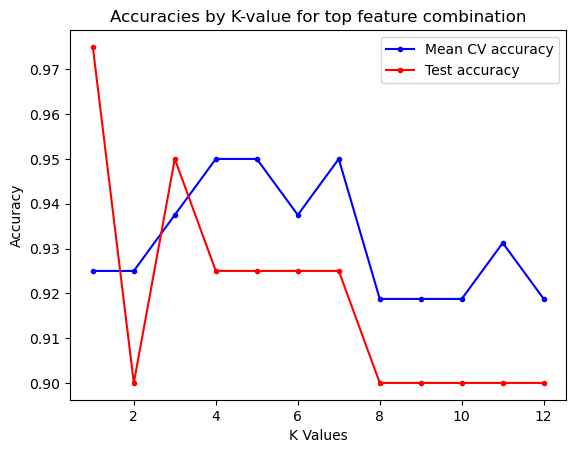

In [97]:
cvacc2=[]
testacc2=[]
for k in range(1,13):
    knn = KNN(n_neighbors=k,n_jobs=-1)
    knn=knn.fit(X_train[['g', 'r', 'i', 'redshift', 'log_redshift']],y_train)
    cvacc2.append(cross_val_score(knn, X_train[['g', 'r', 'i', 'redshift', 'log_redshift']],y_train, cv = 5, scoring = 'accuracy').mean())
    testacc2.append(knn.score(X_test[['g', 'r', 'i', 'redshift', 'log_redshift']],y_test))
plt.plot(range(1,13),cvacc2,linestyle='-',marker='.',color='blue',label='Mean CV accuracy')
plt.plot(range(1,13),testacc2,linestyle='-',marker='.',color='red',label='Test accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Accuracies by K-value for top feature combination')
plt.legend()
plt.show()

### Large Scale models  <a id="large_scale_models"><a/> 


The support vector classifier has been withdrawn from the large scale model selection due to the computationally expensive nature of the model, when attempted in the local environment, it led to timeout errors and terminal shutdown. Utilisation of much stronger hardware or processing methods is required for the use of such a model in a large scale space.

In [98]:
#Split the full dataset
X_train, X_test, y_train, y_test = train_test_split(X, SDSS['class'], test_size=0.2, stratify=SDSS['class'],random_state=94)

In [99]:
#Initialise and fit Logistic Regression model
bigmod1 = LogReg(
    multi_class='ovr',
    solver='saga', 
    random_state=94
)
bigmod1=bigmod1.fit(X_train,y_train)

In [100]:
#Initialise and fit Decision Tree model
bigmod2 = DTC(
    criterion= 'gini', 
    max_depth= 3, 
    min_impurity_decrease= 0.05, 
    min_samples_leaf= 1, 
    min_samples_split= 2,
    random_state=94
)
bigmod2 = bigmod2.fit(X_train,y_train)

In [101]:
#Initialise and fit Random Forest model
bigmod3 = RFC(
    criterion= 'entropy', 
    max_depth= None, 
    max_features= 2, 
    n_estimators= 50,
    random_state=94
)
bigmod3 = bigmod3.fit(X_train,y_train)

In [102]:
#Initialise base models for boosting
basemodGNB = GNB(var_smoothing=1e-9)
basemodDT = DTC(
    criterion= 'gini', 
    max_depth= 3, 
    min_samples_leaf= 1
)

In [103]:
#Initialise and fit Adaboosted Gaussian Naive Bayes model
bigmod4 = ABC(
    estimator=basemodGNB, 
    learning_rate= 0.01, 
    n_estimators= 150, 
    random_state=94
)
bigmod4 = bigmod4.fit(X_train,y_train)

In [104]:
#Initialise and fit Adaboosted Decision Tree model
bigmod5 = ABC(
    estimator=basemodDT, 
    learning_rate= 0.01, 
    n_estimators= 60, 
    random_state=94
)
bigmod5 = bigmod5.fit(X_train,y_train)

In [105]:
#Initialise and fit Light Gradient Boosted model
bigmod6 = LGBC(
    objective='multiclass', 
    num_class=3, 
    boosting_type= 'gbdt', 
    learning_rate= 0.04, 
    max_depth= 2, 
    min_child_samples= 25, 
    min_gain_to_split= 0.001, 
    n_estimators= 30, 
    num_leaves= 10, 
    random_state=94,
    force_col_wise=True, 
    verbose=-1
)
bigmod6 = bigmod6.fit(X_train,y_train)

In [106]:
#Initialise Logistic regressor for stacking and Stacking Classifier and fit model
lr = LogReg(
    C=1, 
    multi_class='ovr', 
    solver='saga', 
    max_iter=50000,
    random_state=94
)
estimators = [('LogReg', bigmod1), ('DTC', bigmod2), ('RFC', bigmod3), ('ABGNB', bigmod4), ('ABDT', bigmod5), ('LGBC', bigmod6)]
bigstack = SC(
    estimators=estimators, 
    final_estimator=lr, 
    cv=5, 
    n_jobs=-1)
bigstack = bigstack.fit(X_train,y_train)
print(f"Train set accuracy of stack model is {bigstack.score(X_train,y_train)}")
print(f"Test set accuracy of stack model is {bigstack.score(X_test,y_test)}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Train set accuracy of stack model is 0.9998374979687246
Test set accuracy of stack model is 0.9774


#### KNN

In [107]:
feats=['g', 'r', 'i', 'redshift', 'log_redshift']
bigknn = KNN(n_neighbors=1,n_jobs=-1)
bigknn=knn1.fit(X_train[feats],y_train)

## Model Evaluation <a id="model-evaluation"><a/>

### Accuracies <a id="accuracies"><a/>

In [108]:
def eval(mod,mod_type,feats=False):
    if feats !=False:
        a=X_train[feats]
        b=X_test[feats]
    else:
        a=X_train
        b=X_test
    test_pred = mod.predict(b)
    print(f"Accuracy on training set for {mod_type} model is {mod.score(a,y_train)}")
    print(f"Accuracy on testing set for {mod_type} model is {mod.score(b,y_test)}")
    confusion_matrix=metrics.confusion_matrix(y_test, test_pred)
    conf = pd.DataFrame(confusion_matrix, columns=['Galaxy', 'QSO','Star'], index=['is_Galaxy', 'is_QSO','is_Star'])
    print(f"{mod_type} Model Confusion Matrix:")
    display(conf)


#### Logistic Regression

In [109]:
eval(bigmod1,'Logistic Regression')

Accuracy on training set for Logistic Regression model is 0.9560869510868886
Accuracy on testing set for Logistic Regression model is 0.95265
Logistic Regression Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11509,203,177
is_QSO,505,3284,3
is_Star,57,2,4260


#### Decision Tree

In [110]:
eval(bigmod2, 'Decision Tree')

Accuracy on training set for Decision Tree model is 0.9474993437417968
Accuracy on testing set for Decision Tree model is 0.9466
Decision Tree Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11572,207,110
is_QSO,751,3041,0
is_Star,0,0,4319


#### Random Forest

In [111]:
eval(bigmod3, 'Random Forest')

Accuracy on training set for Random Forest model is 0.9998374979687246
Accuracy on testing set for Random Forest model is 0.97655
Random Forest Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11702,150,37
is_QSO,281,3511,0
is_Star,1,0,4318


#### Adaboosted Gaussian Naive Bayes

In [112]:
eval(bigmod4, 'Adaboosted Gaussian Naive Bayes')

Accuracy on training set for Adaboosted Gaussian Naive Bayes model is 0.7002087526094076
Accuracy on testing set for Adaboosted Gaussian Naive Bayes model is 0.7037
Adaboosted Gaussian Naive Bayes Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,6306,5475,108
is_QSO,330,3462,0
is_Star,13,0,4306


#### Adaboosted Decision Tree

In [113]:
eval(bigmod5,'Adaboosted Decision Tree')

Accuracy on training set for Adaboosted Decision Tree model is 0.9508618857735722
Accuracy on testing set for Adaboosted Decision Tree model is 0.95015
Adaboosted Decision Tree Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11643,163,83
is_QSO,751,3041,0
is_Star,0,0,4319


#### Light Gradient Boosted Machine

In [114]:
eval(bigmod6, 'Light Gradient Boosted Machine')

Accuracy on training set for Light Gradient Boosted Machine model is 0.9498618732734159
Accuracy on testing set for Light Gradient Boosted Machine model is 0.95
Light Gradient Boosted Machine Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11658,124,107
is_QSO,762,3030,0
is_Star,7,0,4312


#### Final Stacked Model

In [115]:
eval(bigstack, 'Final Stacked')

Accuracy on training set for Final Stacked model is 0.9998374979687246
Accuracy on testing set for Final Stacked model is 0.9774
Final Stacked Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11704,166,19
is_QSO,266,3526,0
is_Star,1,0,4318


#### KNN Model

In [116]:
eval(bigknn, 'KNN',feats=feats)

Accuracy on training set for KNN model is 1.0
Accuracy on testing set for KNN model is 0.95875
KNN Model Confusion Matrix:


,Galaxy,QSO,Star
is_Galaxy,11453,344,92
is_QSO,307,3484,1
is_Star,79,2,4238


### ROC curves <a id="roc-curves"><a/>

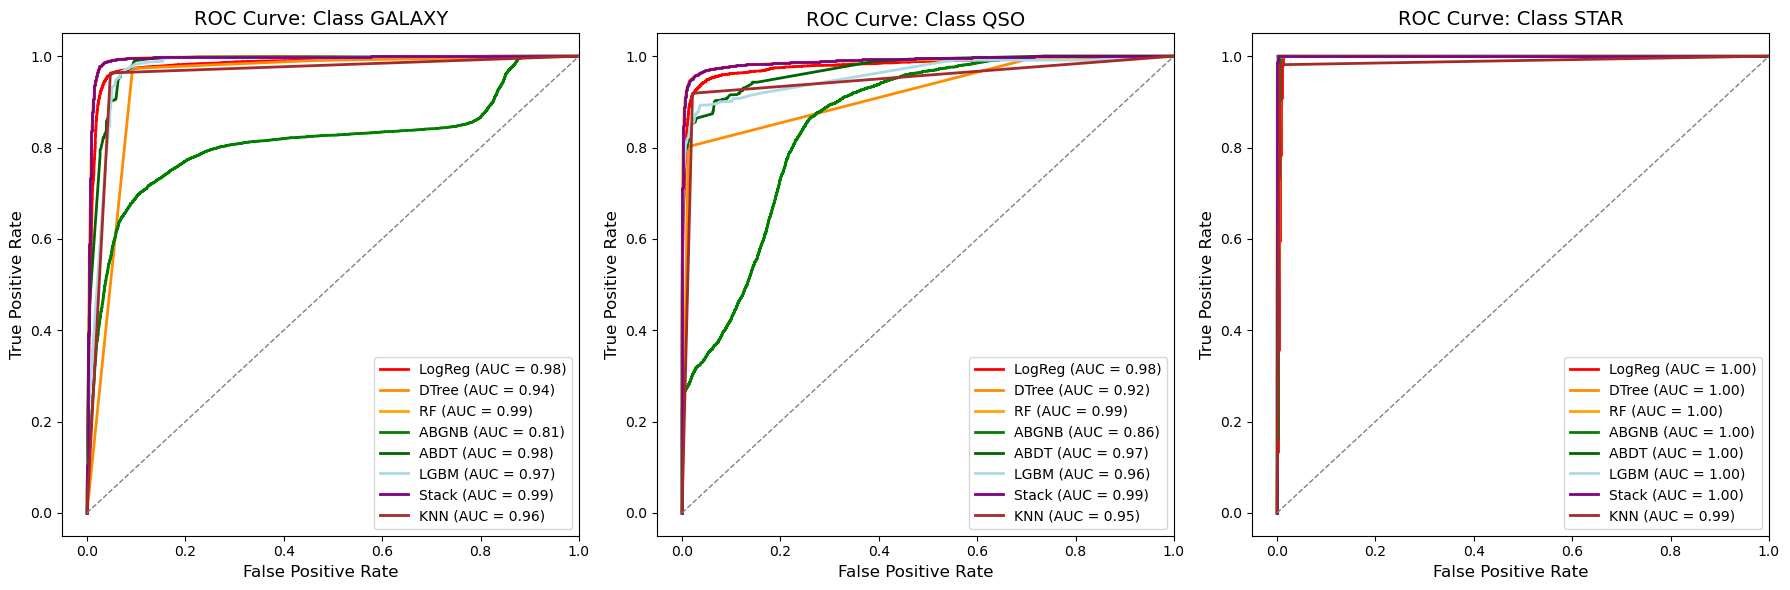

In [117]:
# Compute ROC curves and AUCs for each class
from sklearn.preprocessing import label_binarize
models = [bigmod1, bigmod2, bigmod3, bigmod4, bigmod5, bigmod6, bigstack, bigknn]
model_names = ['LogReg', 'DTree', 'RF', 'ABGNB', 'ABDT', 'LGBM', 'Stack', 'KNN']
colors = ['red', 'darkorange', 'orange', 'green', 'darkgreen', 'lightblue', 'purple', 'brown']

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['GALAXY', 'QSO', 'STAR'])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=[18, 6])

for i in range(n_classes):  # Loop over each class
    class_name = ['GALAXY', 'QSO', 'STAR'][i]
    plt.subplot(1, 3, i+1)

    for model, name, color in zip(models, model_names, colors):
        if name == 'KNN':
            probs = model.predict_proba(X_test[feats])  # Use only specified features for KNN
        else:
            probs = model.predict_proba(X_test)  # Use all features for other models
        
        # Compute ROC curve and ROC area for current class vs rest
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve: Class ' + class_name, fontsize=14)
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.tight_layout()
plt.show()

### Classification Proportions <a id="class-props"><a/>

In [129]:
def props(mod,feats=False):
    if feats !=False:
        a=X_test[feats]
    else:
        a=X_test
    test_predictions = mod.predict(a)
    miss=1-mod.score(a,y_test)
    propsizes=[]
    confu=metrics.confusion_matrix(y_test, test_predictions)
    tpos = np.diag(confu) / len(y_test)
    for i in range(3):
        propsizes.append(tpos[i])
    propsizes.append(miss)
    return propsizes

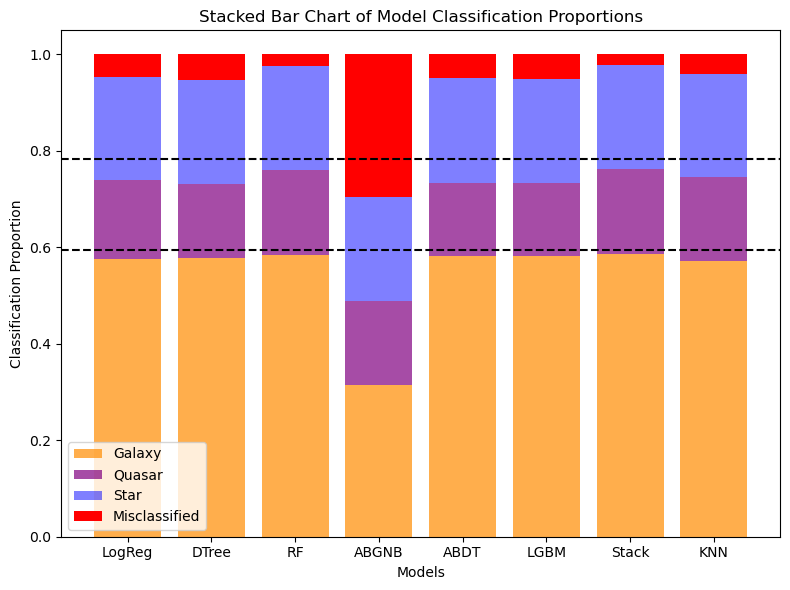

In [138]:
#plot proportions of each classification for each model
sizes1 = np.array(props(bigmod1))
sizes2 = np.array(props(bigmod2))
sizes3 = np.array(props(bigmod3))
sizes4 = np.array(props(bigmod4))
sizes5 = np.array(props(bigmod5))
sizes6 = np.array(props(bigmod6))
sizes7 = np.array(props(bigstack))
sizes8 = np.array(props(bigknn,feats=feats))
labels = ['Galaxy', 'Quasar', 'Star','Misclassified']
proportions = np.vstack((sizes1,sizes2,sizes3,sizes4,sizes5,sizes6,sizes7,sizes8))
yprops=[]
for i in range(3):
    yprops.append(sum(y_test_bin[:,i])/len(y_test))
# Plotting stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
# Iterate over each model to plot stacked bars
ax.bar(model_names, proportions[:,0], label=labels[0],color='darkorange',alpha=0.7)
ax.bar(model_names, proportions[:,1], bottom=proportions[:,0], label=labels[1],color='purple',alpha=0.7)
ax.bar(model_names, proportions[:,2], bottom=proportions[:,0]+proportions[:,1], label=labels[2],color='blue',alpha=0.5)
ax.bar(model_names, proportions[:,3], bottom=proportions[:,0]+proportions[:,1]+proportions[:,2], label=labels[3],color='red')
ax.axhline(y=yprops[0],color='black',linestyle='--')
ax.axhline(y=yprops[0]+yprops[1],color='black',linestyle='--')
# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Classification Proportion')
ax.set_title('Stacked Bar Chart of Model Classification Proportions')
ax.legend()

plt.tight_layout()
plt.show()

## Conclusions <a id="conclusions"><a/>

Evaluation of the classification models trained on 80% of the original dataset has shown that, with the exception of the AdaBoosted Gaussian Naive Bayes model, all models were able to achieve at least 94.6% accuracy on the test set reaching a maximum of 97.74% accuracy with the Stacked ensemble method. Due to the clear deviation of the feature distributions from Gaussian normality it is not surprising that the ABGNB model performed significantly worse; only attaining 70% accuracy on both the training and testing sets.  
    Small scale models extrapolated to the full dataset showed unexpected robustness achieving accuracy around 94% even though only trained on less than 0.5% of the data. The investigation performed on the small scale models showed low reliance of the models on features that were categorical or discrete in nature, that is, the ID columns and cam_col feature. The only exception to this was the plate feature, though this also was never the most important feature. Intuition would suggest that this may be a feature to segment on given that the plates determine which light sources are observed. The logarithmic transformation of the redshift variable proved to be a highly important feature, analysis of which indicated that it shares information with most of the other features though does not completely contain the information of any of them and also contributes unique information to the models.    
    Stellar objects have been shown to be successfully classified using spectrographic data to an accuracy exceeding 97% with the use of a simple laptop processor and models taking seconds to mere minutes to process.

## Growth & Next Steps <a id="growth"><a/>

* Whilst the results appear conclusive, statistical analyses are required to confirm that the conlusions drawn were no merely due to random chance. key aspects to investigate are the effects of the training set size on the predictive power, the feature importance in each model, and the efect of feature engineering on model improvement.
* Whilst ultimately not contributing to the models in a large way, there were many instances of transcription error, or more aptly, truncation error, of encoded variables contributing to loss of information. To avoid this in future, the unique information encoded in the variables should be present as an uncoded feature in the dataset and the encoded variables removed entirely from feature selection.
* To improve model time efficiency and increase the range of hyper parameters available for tuning, GPU or cloud processing options should be considered.
* Considerations should be taken to distribution segmentation, perhaps based on the plates used, an investigation into the significance of segmentation on accuracy would show how robust the data is to telescope setup.
* Expanding the data to cover the entire night sky in both hemispheres would be the natural progression from this investigation. 